# CMPINF0010 Lab Final Project

## __Team Money__

## The Metric

We determined, after very careful consideration, that in order to quantify the best nieghborhood, there was really only one possible metric that would do this. And so, we decided to determine the best neighborhood in Pittsburgh based off of the metric of which neighborhood was the most expensive. 

The reasons for this metric are very simple, for as we all know that if you live in a rich neighborhood, you will become rich by proxxy. We want this, especially because the relationship between happiness and monetary wealth is 1:1. 

In order to determine which neighborhood was the most expensive, we looked at four different measurements of this: **Contract Rent**, **Mortgage Status**, **Housing Unit Value**, and **Wage/Salary Income**. 

## The Data

First, let's begin by setting up our needed libraries

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Contract Rent

This is the measurement which describes the mean price to pay monthly for renting a house/apartment. Of course, we want to go where the people are paying the most, so we are going to be looking for the neighborhood with the *Highest Mean Price*.

We need to first get our data.

In [10]:
rents = pd.read_csv("contract-rent.csv", index_col ="Neighborhood")
rents.head(10)

,Id,Estimate; Total:,Margin of Error; Total:,Estimate; With cash rent:,Margin of Error; With cash rent:,Estimate; With cash rent: - Less than $100,Margin of Error; With cash rent: - Less than $100,Estimate; With cash rent: - $100 to $149,Margin of Error; With cash rent: - $100 to $149,Estimate; With cash rent: - $150 to $199,...,"Estimate; With cash rent: - $2,000 to $2,499","Margin of Error; With cash rent: - $2,000 to $2,499","Estimate; With cash rent: - $2,500 to $2,999","Margin of Error; With cash rent: - $2,500 to $2,999","Estimate; With cash rent: - $3,000 to $3,499","Margin of Error; With cash rent: - $3,000 to $3,499","Estimate; With cash rent: - $3,500 or more","Margin of Error; With cash rent: - $3,500 or more",Estimate; No cash rent,Margin of Error; No cash rent
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,798.0,91.000000,781.0,89.000000,23.0,27.000000,6.0,8.000000,77.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,17.0,12.000000
Allegheny West,2,77.0,31.000000,77.0,31.000000,0.0,10.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
Allentown,3,531.0,138.166566,481.0,120.540450,0.0,17.320508,0.0,17.320508,18.0,...,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508,50.0,78.287930
Arlington,4,209.0,70.562029,204.0,69.899928,0.0,17.320508,0.0,17.320508,0.0,...,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508,5.0,15.779734
Arlington Heights,5,144.0,59.000000,140.0,59.000000,0.0,10.000000,6.0,8.000000,23.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,4.0,6.000000
Banksville,6,961.0,190.089453,961.0,190.089453,0.0,20.000000,0.0,20.000000,0.0,...,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000
Bedford Dwellings,7,675.0,56.000000,668.0,57.000000,216.0,72.000000,20.0,19.000000,37.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,7.0,10.000000
Beechview,8,1502.0,236.021185,1464.0,234.068366,0.0,31.622777,0.0,31.622777,0.0,...,0.0,31.622777,0.0,31.622777,0.0,31.622777,0.0,31.622777,38.0,39.370039
Beltzhoover,9,292.0,111.772090,287.0,111.772090,0.0,20.000000,10.0,22.912878,0.0,...,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000,5.0,19.519221


The way our data is set up, we have counts of which neighborhoods have a certain value of rent. For example, we can see here that Allgeheny Center has 77 people in this set that have rent from 150 to 199 dollars. 

In order to find the average rent for each neighborhood, we can divide the total rent each sample group in this dataset pays and divide it by the sample size. 

In order to do this, we can first start by making a dictionary which stores the column name along with the mean price in the price range. This is the number that we'll use in our calculations, as there is no data to indicate whether the rent falls in the low or high ends of the range.

In [11]:
value_dict = {
    "Less than $100" : 100,
    "$100 to $149" : 125,
    "$150 to $199" : 175,
    "$200 to $249" : 225,
    "$250 to $299" : 275,
    "$300 to $349" : 325,
    "$350 to $399" : 375,
    "$400 to $449" : 425,
    "$450 to $499" : 475,
    "$500 to $549" : 525,
    "$550 to $599" : 575,
    "$600 to $649" : 625,
    "$650 to $699" : 675,
    "$700 to $749" : 725,
    "$750 to $799" : 775,
    "$800 to $899" : 850,
    "$900 to $999" : 950,
    "$1,000 to $1,249" : 1125,
    "$1,250 to $1,499" : 1375,
    "$1,500 to $1,999" : 1750,
    "$2,000 to $2,499" : 2250,
    "$2,500 to $2,999" : 2750,
    "$3,000 to $3,499" : 3250,
    "$3,500 or more" : 3500,
}

Next, we can use this dictionary to add up all of the rents for each column, and then divide it by the people polled.
For places with no sample group, we will just have them set as paying 0 rent, which will exclude them from this measurement.

In [12]:
total_avgs = []
for index, row in rents.iterrows():
    total_rent = 0
    for key in value_dict.keys():
        total_rent += row["Estimate; With cash rent: - " + key] * value_dict[key]
        total_houses = row['Estimate; Total:']

    if total_houses == 0:
        total_avgs.append(0)
    else:
        total_avgs.append(float((total_rent))/total_houses)

neighborhoods = rents.index
average_rents = pd.DataFrame({"Neighborhood": neighborhoods, "Average Rent": total_avgs})
average_rents = average_rents.set_index("Neighborhood")
average_rents = average_rents.sort_values(by="Average Rent", ascending = False)
average_rents.head()

,Average Rent
Neighborhood,
Strip District,1675.111607
North Shore,1400.487013
Central Business District,1333.672820
Ridgemont,1276.923077
Squirrel Hill North,1176.389879


Now, we can just graph this new dataset.

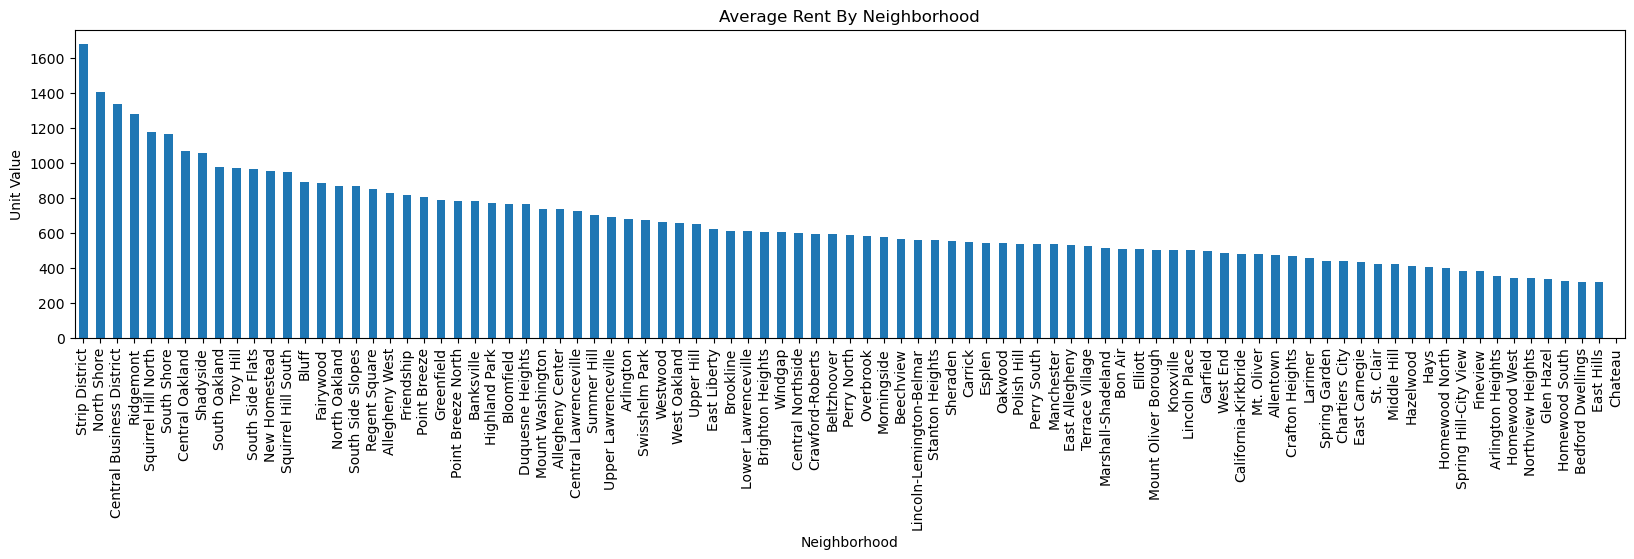

In [18]:
average_rents.plot(kind="bar", stacked = True, ylim = 0, figsize = (20, 4), title = "Average Rent By Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Unit Value")
plt.legend("", frameon=False)
plt.show()

From this data, we can see that the Strip District has the most expensive average rent out of any neighborhood, coming in at an average of $1675 a month. And, as such, this is the best place to live in Pittsburgh (For this metric).

### Housing Unit Value

This is the measurement of the average value of each house in a nieghborhood.

First, let's print out the data set to see what we are working with. 

In [20]:
housing_unit = pd.read_csv("unit-value.csv", index_col ="Neighborhood")
housing_unit.head(len(housing_unit.index))

,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Margin of Error; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999",...,"Estimate; Total: - $500,000 to $749,999","Margin of Error; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Margin of Error; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 to $1,499,999","Margin of Error; Total: - $1,000,000 to $1,499,999","Estimate; Total: - $1,500,000 to $1,999,999","Margin of Error; Total: - $1,500,000 to $1,999,999","Estimate; Total: - $2,000,000 or more","Margin of Error; Total: - $2,000,000 or more"
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,72.0,28.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
Allegheny West,2,69.0,31.000000,4.0,7.000000,0.0,10.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,11.0,17.000000,0.0,10.000000,0.0,10.000000
Allentown,3,538.0,112.769677,45.0,33.734256,19.0,21.118712,22.0,26.153394,44.0,...,6.0,16.763055,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508
Arlington,4,492.0,84.433406,12.0,16.186414,29.0,27.513633,5.0,16.248077,43.0,...,7.0,17.916473,0.0,17.320508,3.0,15.779734,0.0,17.320508,0.0,17.320508
Arlington Heights,5,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,87,594.0,115.952577,0.0,17.320508,0.0,17.320508,17.0,27.856777,13.0,...,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508
West End,88,35.0,23.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,12.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
West Oakland,89,204.0,51.855569,0.0,14.142136,0.0,14.142136,10.0,16.401219,0.0,...,0.0,14.142136,0.0,14.142136,0.0,14.142136,0.0,14.142136,0.0,14.142136


That's a lot of information, however it is quite simple once you look at it all. We've 26 price ranges that housing units call fall under. In order to find which neighborhood has the most expensive housing units on average, we can add every price range multiplied by the number of units listed under it for each neighborhood and divide it by the total number of units within the neighborhood.
For ease of viewing, we'll create two new colums in our data set, one showing the sum of the cost of every unit in the neighborhood, and one for the average of each neighborhood.

We can also rename the columns to be referenced in our calculations, setting them to the average of the starting and endpoints.

For our purposes, we'll ignore the margin of error metric.

In [21]:
value_dict = {
    "Less than $10,000" : 10000,
    "$10,000 to $14,999" : 125000,
    "$15,000 to $19,999" : 17500,
    "$20,000 to $24,999" : 22500,
    "$25,000 to $29,999" : 27500,
    "$30,000 to $34,999" : 32500,
    "$35,000 to $39,999" : 37500,
    "$40,000 to $49,999" : 45000,
    "$50,000 to $59,999" : 55000,
    "$60,000 to $69,999" : 65000,
    "$70,000 to $79,999" : 75000,
    "$80,000 to $89,999" : 85000,
    "$90,000 to $99,999" : 95000,
    "$100,000 to $124,999" : 112500,
    "$125,000 to $149,999" : 137500,
    "$150,000 to $174,999" : 162500,
    "$175,000 to $199,999" : 187500,
    "$200,000 to $249,999" : 225000,
    "$250,000 to $299,999" : 275000,
    "$300,000 to $399,999" : 350000,
    "$400,000 to $499,999" : 450000,
    "$500,000 to $749,999" : 625000,
    "$750,000 to $999,999" : 875000,
    "$1,000,000 to $1,499,999" : 1250000,
    "$1,500,000 to $1,999,999" : 1750000,
    "$2,000,000 or more" : 2000000
}

In [22]:
toDrop = []
for i in range(2, len(housing_unit.columns)):
    if i % 2 == 0:
        toDrop.append(housing_unit.columns.tolist()[i])
housing_unit = housing_unit.drop(toDrop, axis = 1)
housing_unit.head()

,Id,Estimate; Total:,"Estimate; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999","Estimate; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999","Estimate; Total: - $40,000 to $49,999",...,"Estimate; Total: - $175,000 to $199,999","Estimate; Total: - $200,000 to $249,999","Estimate; Total: - $250,000 to $299,999","Estimate; Total: - $300,000 to $399,999","Estimate; Total: - $400,000 to $499,999","Estimate; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 to $1,499,999","Estimate; Total: - $1,500,000 to $1,999,999","Estimate; Total: - $2,000,000 or more"
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allegheny West,2,69.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,15.0,21.0,0.0,0.0,0.0,11.0,0.0,0.0
Allentown,3,538.0,45.0,19.0,22.0,44.0,100.0,49.0,24.0,97.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
Arlington,4,492.0,12.0,29.0,5.0,43.0,27.0,45.0,49.0,87.0,...,0.0,2.0,0.0,0.0,0.0,7.0,0.0,3.0,0.0,0.0
Arlington Heights,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We'll create a dictionary to store our average prices. The values of this dictionary will then be used as the new row to our data set containing all the average values.

We can calculate the average housing unit value for each row by iterating through each row, and multiplying the number of times a certain value appears with the value itself. Then, we divide by the sample size to get our average. 
This average is added to our dictionary under the same row name as the data used to calculate it.

We can also clean up our data by dropping any rows that don't have enough data (a sample size of 0), as we would be left with an indetermine value of 0/0 otherwise. 

Finally, we can add the values of our average price dictionary as a new column to the dataframe, and then sort by it in descending order.

In [23]:
avg_price = {}
rowsToDrop = []
for index, row in housing_unit.iterrows():
    if index not in avg_price:
        avg_price[index] = 0
    for value in value_dict.keys():
        avg_price[index] += row["Estimate; Total: - " + value] * value_dict[value]
    if row["Estimate; Total:"] != 0:
        avg_price[index] /= row["Estimate; Total:"]
    else:
        toDrop.append(index)
housing_unit = housing_unit.drop(rowsToDrop, axis = 0)
housing_unit.insert(1, "Average Price", avg_price)
housing_unit = housing_unit.sort_values(by="Average Price", ascending = False)

housing_unit.head()

,Id,Average Price,Estimate; Total:,"Estimate; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999","Estimate; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999",...,"Estimate; Total: - $175,000 to $199,999","Estimate; Total: - $200,000 to $249,999","Estimate; Total: - $250,000 to $299,999","Estimate; Total: - $300,000 to $399,999","Estimate; Total: - $400,000 to $499,999","Estimate; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 to $1,499,999","Estimate; Total: - $1,500,000 to $1,999,999","Estimate; Total: - $2,000,000 or more"
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Chateau,22,625000.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
Squirrel Hill North,77,517580.071174,1967.0,11.0,0.0,0.0,0.0,0.0,8.0,0.0,...,77.0,216.0,188.0,279.0,307.0,383.0,206.0,74.0,21.0,50.0
Allegheny West,2,405652.173913,69.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,15.0,21.0,0.0,0.0,0.0,11.0,0.0,0.0
Shadyside,69,366632.231405,1936.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,...,95.0,244.0,268.0,332.0,163.0,243.0,111.0,36.0,17.0,0.0
Point Breeze,64,349149.722736,1623.0,14.0,0.0,0.0,15.0,0.0,5.0,0.0,...,80.0,217.0,250.0,318.0,246.0,168.0,71.0,8.0,4.0,0.0


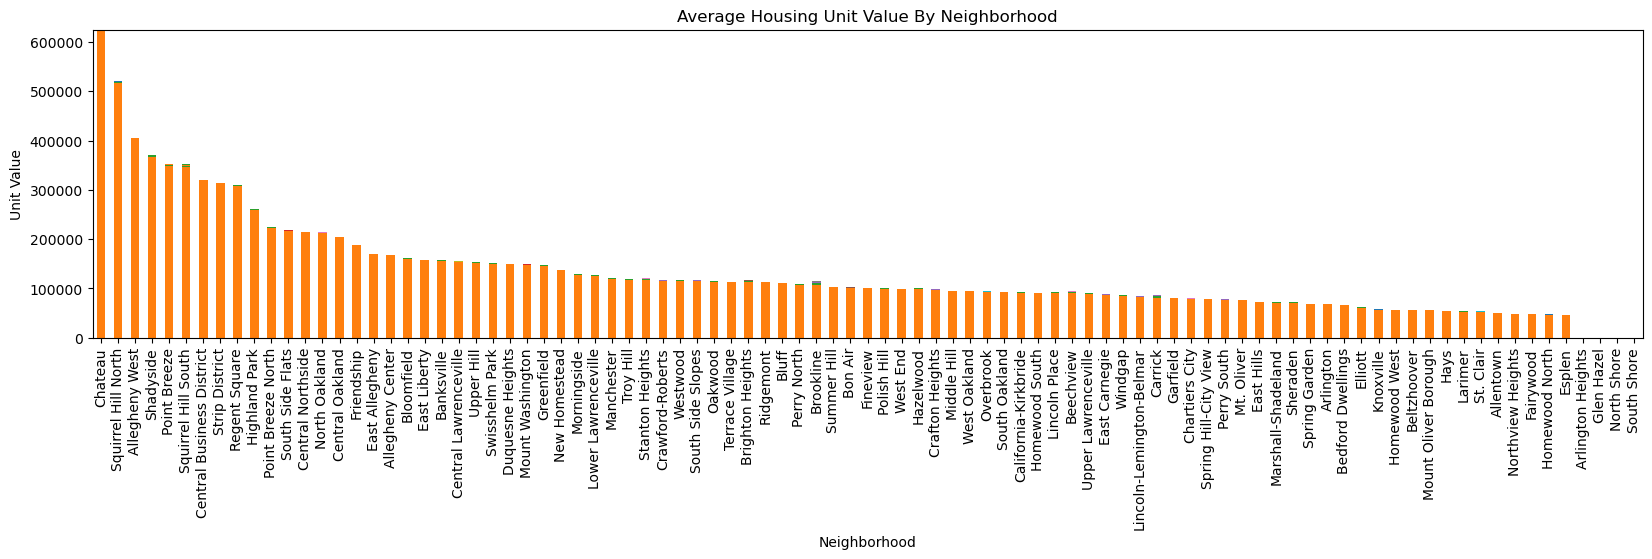

In [27]:
housing_unit.plot(kind="bar", stacked = True, ylim = 0, figsize = (20, 4), title = "Average Housing Unit Value By Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Unit Value")
plt.legend("", frameon=False)
plt.show()

Thus, by this metric that Chateau is the best neighborhood in Pittsburgh

### Mortgage Status

This is the measurement which describes the amount of houses in the data set which either have or do not have a mortgage on them. Since we want the neighborhood where people are spending the most money, they should have enough money to pay the mortgage. So, we are going to be looking for which neighborhood has the lowest amount of average mortgages.

We need to first get our data.

In [49]:
# Load and clean data
mortgage_status = pd.read_csv("mortgage-status.csv", index_col = "Neighborhood")
mortgage_status.head()

,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Housing units with a mortgage, contract to purchase, or similar debt:","Margin of Error; Housing units with a mortgage, contract to purchase, or similar debt:","Estimate; Housing units with a mortgage, contract to purchase, or similar debt: - With either a second mortgage or home equity loan, but not both:","Margin of Error; Housing units with a mortgage, contract to purchase, or similar debt: - With either a second mortgage or home equity loan, but not both:","Estimate; Housing units with a mortgage, contract to purchase, or similar debt: - With either a second mortgage or home equity loan, but not both: - Second mortgage only","Margin of Error; Housing units with a mortgage, contract to purchase, or similar debt: - With either a second mortgage or home equity loan, but not both: - Second mortgage only","Estimate; Housing units with a mortgage, contract to purchase, or similar debt: - With either a second mortgage or home equity loan, but not both: - Home equity loan only","Margin of Error; Housing units with a mortgage, contract to purchase, or similar debt: - With either a second mortgage or home equity loan, but not both: - Home equity loan only","Estimate; Housing units with a mortgage, contract to purchase, or similar debt: - Both second mortgage and home equity loan","Margin of Error; Housing units with a mortgage, contract to purchase, or similar debt: - Both second mortgage and home equity loan","Estimate; Housing units with a mortgage, contract to purchase, or similar debt: - No second mortgage and no home equity loan","Margin of Error; Housing units with a mortgage, contract to purchase, or similar debt: - No second mortgage and no home equity loan",Estimate; Housing units without a mortgage,Margin of Error; Housing units without a mortgage
Neighborhood,,,,,,,,,,,,,,,,,
Allegheny Center,1,72.0,28.000000,42.0,25.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,42.0,25.00000,30.0,19.000000
Allegheny West,2,69.0,31.000000,32.0,27.000000,22.0,21.000000,0.0,10.000000,22.0,21.000000,0.0,10.000000,10.0,16.00000,37.0,23.000000
Allentown,3,538.0,112.769677,232.0,84.433406,73.0,57.384667,49.0,57.201399,24.0,26.551836,0.0,17.320508,159.0,62.26556,306.0,74.155243
Arlington,4,492.0,84.433406,216.0,58.940648,27.0,28.390139,6.0,16.763055,21.0,28.722813,0.0,17.320508,189.0,52.36411,276.0,72.055534
Arlington Heights,5,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.00000,0.0,10.000000


Unlike the two other data sets, this data set only keeps track of houses with and without a mortgage. So, we will find the total number of houses without a mortgage and divide it by the number of houses in that neighborhood in order to get our percentage.

We can do this by making a new dataframe with the info that we'll collect in an array.

In [50]:
percent_mortgage_status = []
for index, row in mortgage_status.iterrows():
    total_mortgage = row["Estimate; Housing units without a mortgage"]
    total_houses = row["Estimate; Total:"]
    if total_houses != 0:
        percent_mortgage_status.append(float(total_mortgage) / total_houses * 100)
    else:
        percent_mortgage_status.append(0)   

neighborhoods = mortgage_status.index

percentages = pd.DataFrame({"Neighborhood": neighborhoods, "Percentage Houses Without a Mortgage": percent_mortgage_status})
percentages = percentages.set_index("Neighborhood")
percentages = percentages.sort_values(by = 'Percentage Houses Without a Mortgage', ascending = False)

percentages.head()

,Percentage Houses Without a Mortgage
Neighborhood,
Chateau,100.000000
North Oakland,81.328751
Terrace Village,76.785714
Fairywood,73.469388
Bluff,73.417722


Now, we can print our data

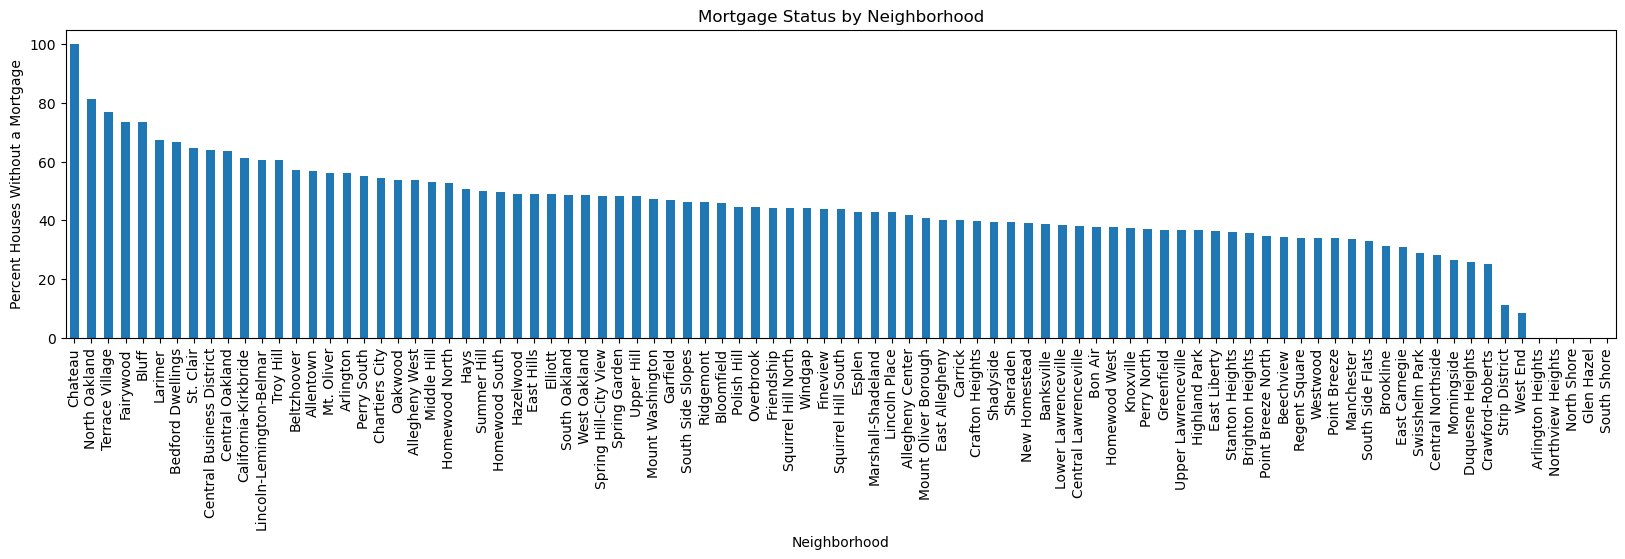

In [61]:
percentages.plot(kind="bar", stacked = True, ylim = 0, figsize = (20, 4), title = "Mortgage Status by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Percent Houses Without a Mortgage")
plt.legend("", frameon=False)
plt.show()

From this data, we can see that Cheateau has the least number of mortgages with a clean 100, making it the best neighborhood.

### Wage/Salary Status

This is the measurement which will describe the number of people with or without a salary in a neighborhood. Of course, we want to be where all the money is, so we want as high of a rate of salaries as possible.

As usual, let's check our data:

In [53]:
neighborhoodIncomes = pd.read_csv("wage-or-salary-income-in-the-past-12-months-for-households (1).csv", index_col = "Neighborhood")
neighborhoodIncomes.head(5)

,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
Neighborhood,,,,,,,
Allegheny Center,1,733.0,103.000000,462.0,94.000000,271.0,87.000000
Allegheny West,2,150.0,46.000000,120.0,40.000000,30.0,26.000000
Allentown,3,1138.0,152.751432,772.0,146.771932,366.0,109.389213
Arlington,4,685.0,105.366029,566.0,104.589674,119.0,44.452222
Arlington Heights,5,170.0,69.000000,96.0,58.000000,74.0,52.000000


Now, let's sort these values based off of which have the most salaries.

In [54]:
mostIncomeGetters = neighborhoodIncomes["Estimate; Total: - With wage or salary income"]
mostIncomeGetters = mostIncomeGetters.sort_values(ascending = False)
mostIncomeGetters.head(10)

Neighborhood
Shadyside              6032.0
Squirrel Hill South    4850.0
Brookline              4578.0
Bloomfield             3789.0
Mount Washington       3256.0
Carrick                3112.0
South Side Flats       2853.0
Beechview              2654.0
Squirrel Hill North    2652.0
Greenfield             2580.0
Name: Estimate; Total: - With wage or salary income, dtype: float64

As this dataset suggests, Shadyside should win by a large margin. But we are not done here, as naturally one would suspect that these results would vary wildly depending on how many people total were surveyed per neighborhood. As shown below...

In [55]:
surveyCounts = neighborhoodIncomes["Estimate; Total:"]
surveyCounts = surveyCounts.sort_values(ascending = False)
surveyCounts.head(10)

Neighborhood
Shadyside              7462.0
Squirrel Hill South    6918.0
Brookline              6017.0
Bloomfield             4640.0
Mount Washington       4425.0
Carrick                4310.0
Beechview              3557.0
South Side Flats       3452.0
Squirrel Hill North    3413.0
Greenfield             3390.0
Name: Estimate; Total:, dtype: float64

The top 10 neighborhoods in people surveyed are nearly identical to the amount of people surveyed with a wage or salary income. Neighborhoods with smaller survey counts are left with no chance.

To rectify this problem, we must look at each neighborhood and divide the number of people surveyed who have wage or salary incomes by the total number of people surveyed

In [56]:
neighborhood_income_arr = []
for index, row in neighborhoodIncomes.iterrows():
    if (row['Estimate; Total:']) != 0:
        neighborhood_income_arr.append(row['Estimate; Total: - With wage or salary income'] / row['Estimate; Total:'])
    else:
        neighborhood_income_arr.append(0)
neighborhoods = neighborhoodIncomes.index
percentIncomes = pd.DataFrame({"Neighborhoods": neighborhoods, "Percent With Incomes":neighborhood_income_arr})
percentIncomes = percentIncomes.set_index("Neighborhoods")
percentIncomes = percentIncomes.sort_values(by = "Percent With Incomes", ascending = False)
percentIncomes.head()

,Percent With Incomes
Neighborhoods,
South Shore,1.000000
Fairywood,0.978118
North Shore,0.943262
Friendship,0.902507
Esplen,0.877551


Finally, let's graph our data

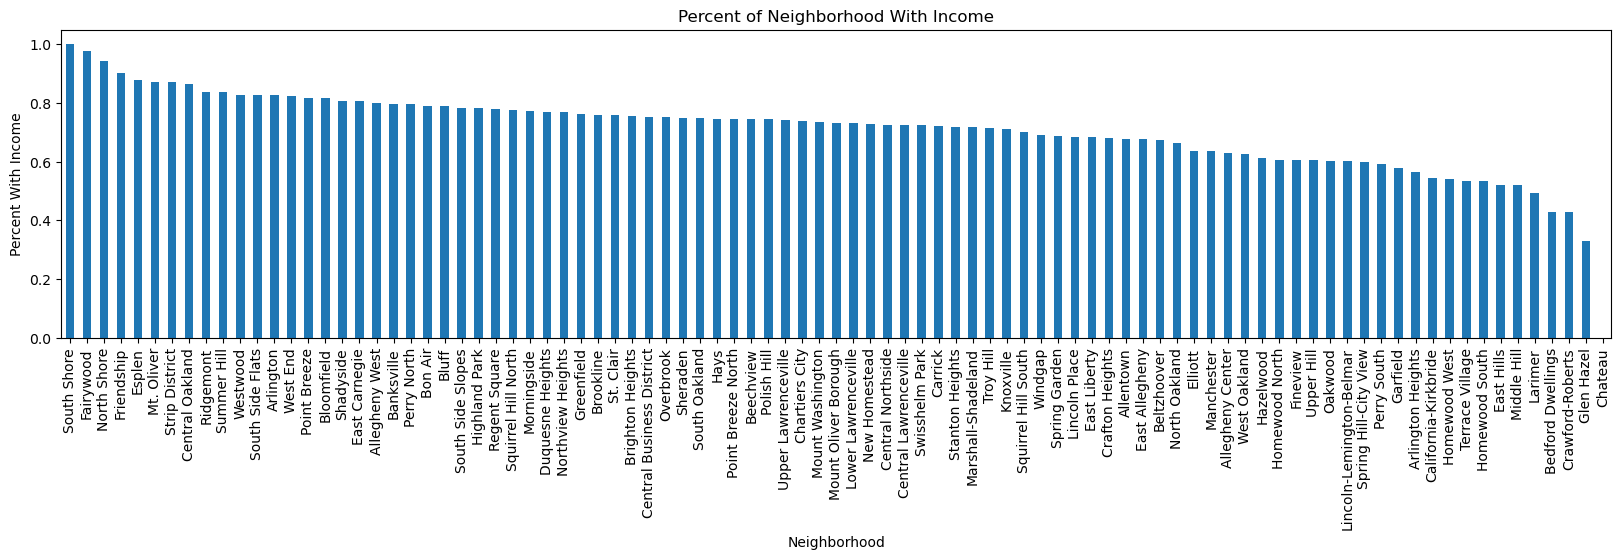

In [60]:
percentIncomes.plot(kind="bar",stacked=True,ylim=0,figsize=(20,4), title = "Percent of Neighborhood With Income")
plt.xlabel("Neighborhood")
plt.ylabel("Percent With Income")
plt.legend("",frameon=False)
plt.show()

This data shows that South Shore is the best neighborhood in Pittsburgh, as it has the highest rate of salary with 100% of the polled citizens having a salary.

# CONCLUSION

We looked at four different ways of analyzing how rich or expensive a neighborhood is. From this, our results were:

**Highest Average Rent: Strip District**

**Highest Average Housing Unit Value: Chateau**

**Highest Percentage Without Mortgage: Chateau**

**Highest Percentage With Income: South Shore**

As per our data sets, Chateau stands at the top of two data sets. It is clear that it has the most expensive housing, so it is clearly the best neighborhood.